<a href="https://colab.research.google.com/github/yudahendriawan/google-colab-projects/blob/image-classification/chessman_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2024-01-30 12:54:00--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2024-01-30 12:54:00--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   174MB/s    in 

In [2]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Rook', 'King', 'Pawn', 'Bishop', 'Queen', 'Knight']

In [4]:
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Bishop images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Bishop')))
print('total Queen images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Queen')))
print('total Rook images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Rook')))
print('total Pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))


total King images : 76
total Bishop images : 87
total Queen images : 78
total Rook images : 102
total Pawn images : 107
total Knight images : 106


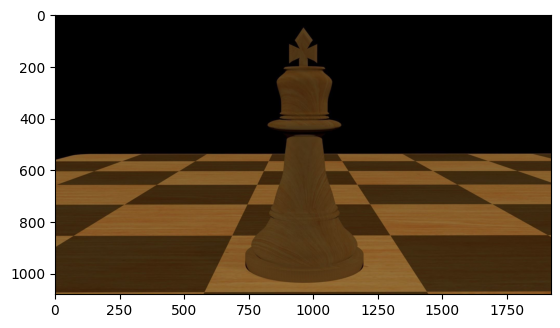

In [5]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [9]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
hist = model.fit(train_generator,
                 validation_data=validation_generator,
                 epochs=50,
                 verbose=2)

Epoch 1/50
63/63 - 15s - loss: 1.8598 - accuracy: 0.1443 - val_loss: 1.7888 - val_accuracy: 0.1923 - 15s/epoch - 230ms/step
Epoch 2/50
63/63 - 7s - loss: 1.7880 - accuracy: 0.1804 - val_loss: 1.7839 - val_accuracy: 0.1923 - 7s/epoch - 115ms/step
Epoch 3/50
63/63 - 7s - loss: 1.7851 - accuracy: 0.1924 - val_loss: 1.7817 - val_accuracy: 0.1923 - 7s/epoch - 104ms/step
Epoch 4/50
63/63 - 7s - loss: 1.7856 - accuracy: 0.1924 - val_loss: 1.7800 - val_accuracy: 0.1923 - 7s/epoch - 116ms/step
Epoch 5/50
63/63 - 7s - loss: 1.7844 - accuracy: 0.1764 - val_loss: 1.7812 - val_accuracy: 0.1923 - 7s/epoch - 113ms/step
Epoch 6/50
63/63 - 8s - loss: 1.7806 - accuracy: 0.1764 - val_loss: 1.7577 - val_accuracy: 0.1923 - 8s/epoch - 128ms/step
Epoch 7/50
63/63 - 7s - loss: 1.7627 - accuracy: 0.2184 - val_loss: 1.7715 - val_accuracy: 0.2115 - 7s/epoch - 116ms/step
Epoch 8/50
63/63 - 9s - loss: 1.7510 - accuracy: 0.2605 - val_loss: 1.7864 - val_accuracy: 0.1731 - 9s/epoch - 138ms/step
Epoch 9/50
63/63 - 7s 

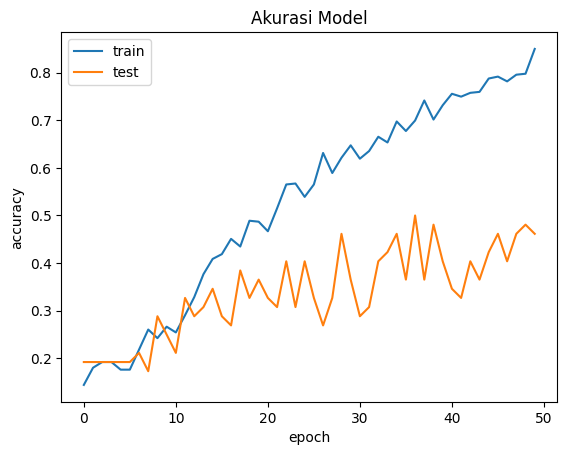

In [11]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

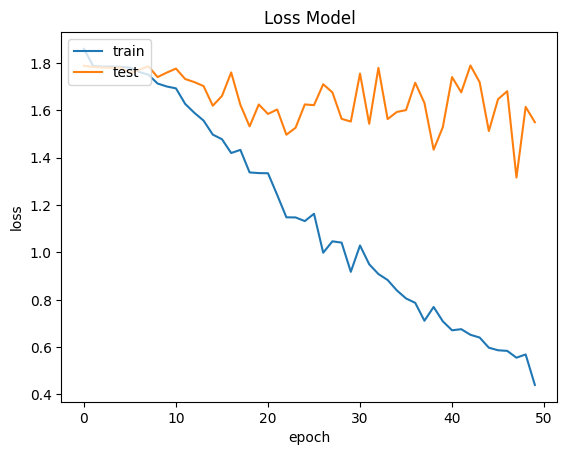

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()